In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("video-game-sales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
columns = df.columns
columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [4]:
values = df.values
values

array([[1, 'Wii Sports', 'Wii', ..., 3.77, 8.46, 82.74],
       [2, 'Super Mario Bros.', 'NES', ..., 6.81, 0.77, 40.24],
       [3, 'Mario Kart Wii', 'Wii', ..., 3.79, 3.31, 35.82],
       ...,
       [16598, 'SCORE International Baja 1000: The Official Game', 'PS2',
        ..., 0.0, 0.0, 0.01],
       [16599, 'Know How 2', 'DS', ..., 0.0, 0.0, 0.01],
       [16600, 'Spirits & Spells', 'GBA', ..., 0.0, 0.0, 0.01]],
      dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
import matplotlib.pyplot as plt
import numpy as np

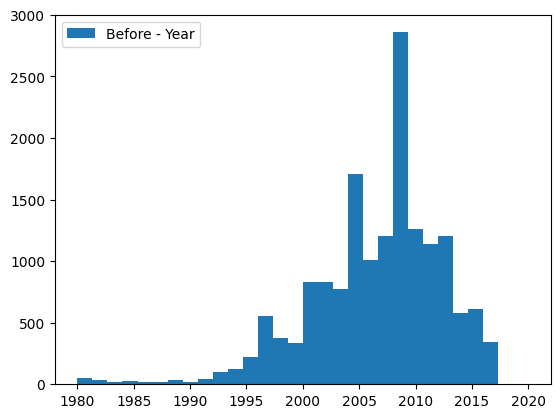

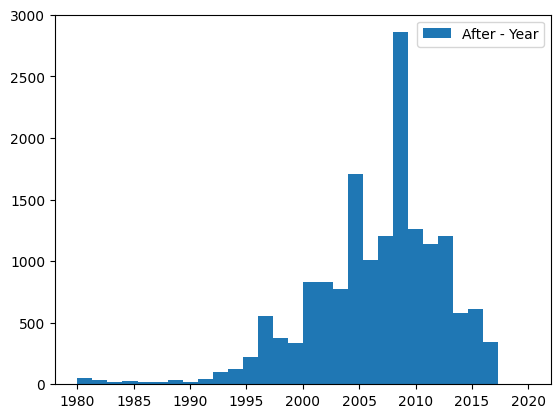

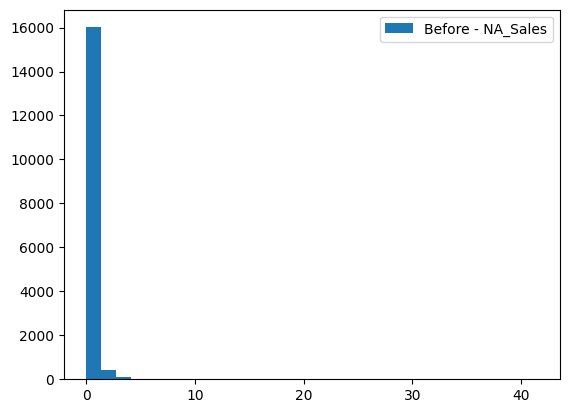

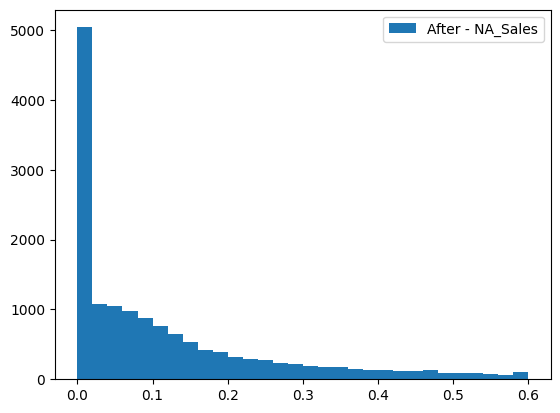

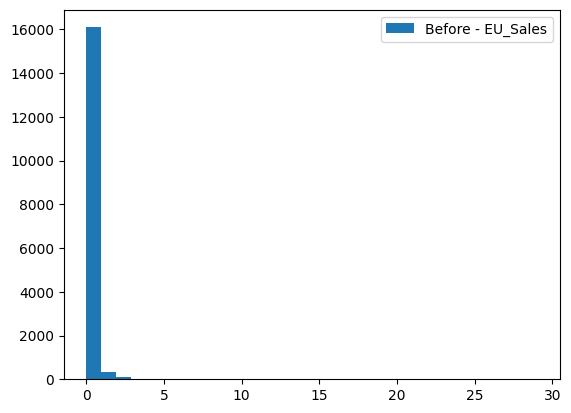

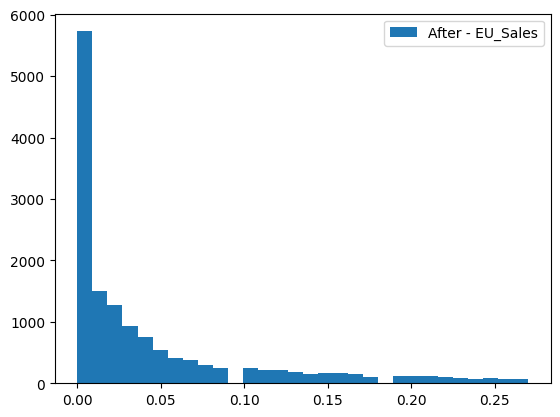

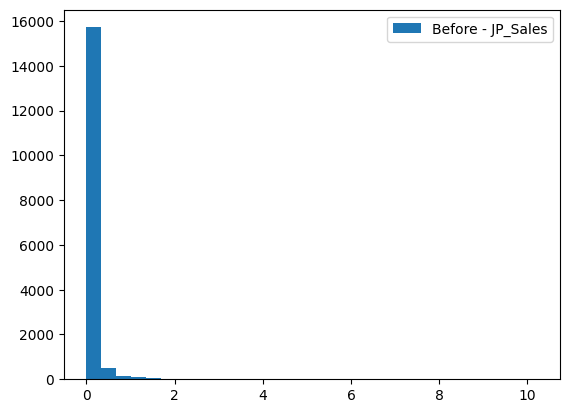

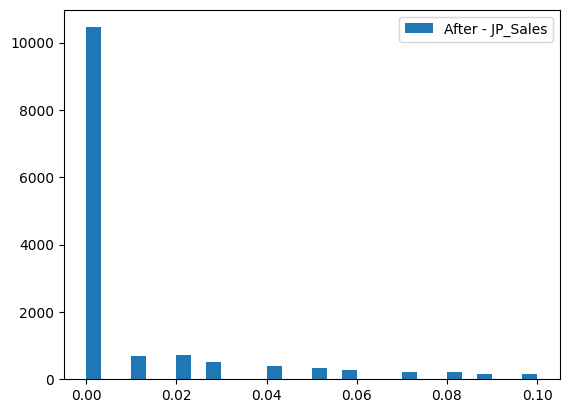

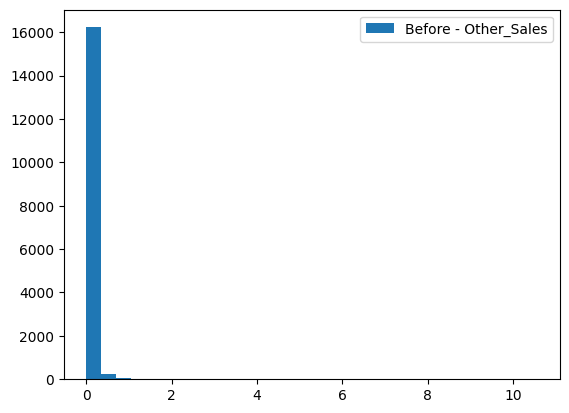

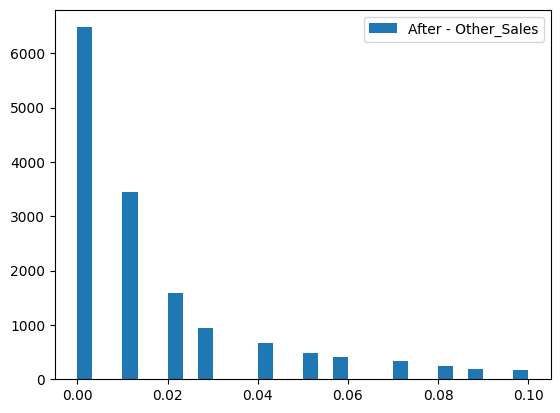

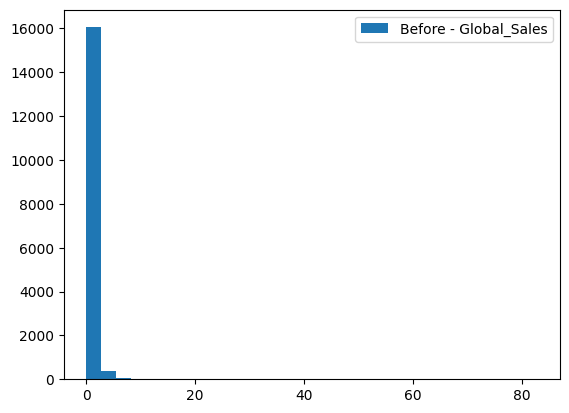

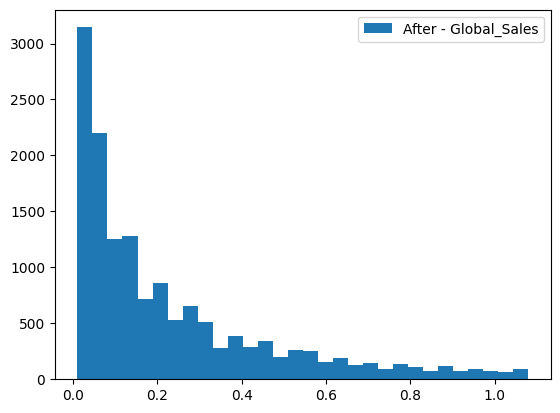

In [7]:
def plot_hist(X, legend):
  _ = plt.figure()
  plt.hist(X, bins=30)
  plt.legend([legend])
  plt.show()


def remove_outliers_iqr(X):
  LQ = np.quantile(X, 0.25)
  UQ = np.quantile(X, 0.75)
  IQR = UQ - LQ
  lower_limit = LQ - 1.5 * IQR
  upper_limit = UQ + 1.5 * IQR

  X[X < lower_limit] = None
  X[X > upper_limit] = None

  return X

def remove_outliers(df):
  for column in df.columns:
    if df[column].dtype != object and df[column].dtype != int:
      X = np.array(df[column].values)
      plot_hist(X, f"Before - {column}")
      X = np.array(df[column].values)
      X = remove_outliers_iqr(X)
      plot_hist(X, f"After - {column}")

df_test = df.drop(["Rank"], axis=1)
remove_outliers(df_test)

In [8]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


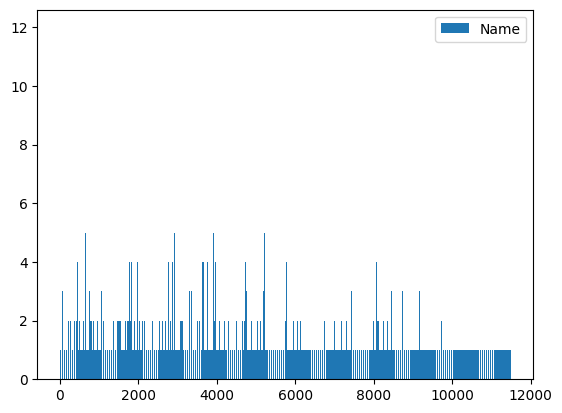

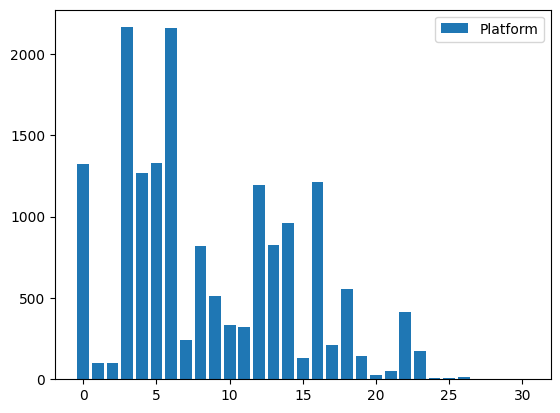

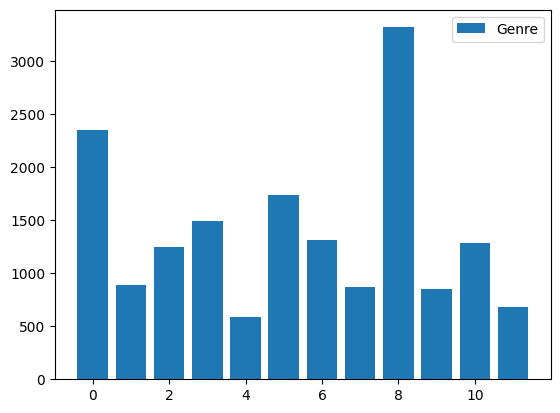

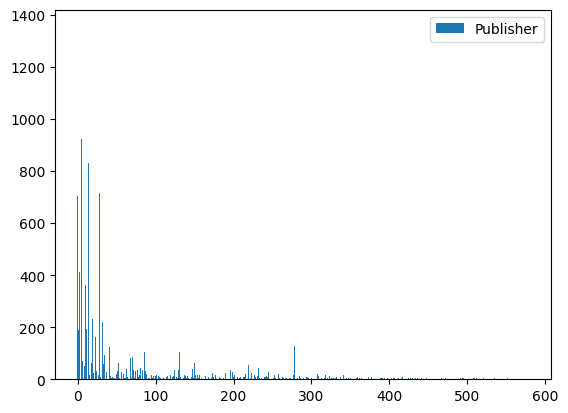

In [9]:
def count_instances(X):
  counts = {}
  for value in X:
    if counts.get(value) is not None:
      counts[value] += 1
    else:
      counts[value] = 1

  return counts

def plot_categorical_hist(counts, legend):
  x = range(len(counts))
  y = list(counts.values())

  _ = plt.figure()
  plt.bar(x, y)
  plt.legend([legend])
  plt.show()

df = pd.read_csv("video-game-sales.csv")
for column in df.columns:
  if df[column].dtype == object:
    X = np.array(df[column].values)
    counts = count_instances(X)
    plot_categorical_hist(counts, column)

In [10]:
cleaned_data = df.drop(["Rank", "Name","Publisher", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales" ], axis=1)
y = cleaned_data["Global_Sales"]
X = cleaned_data.drop("Global_Sales", axis = 1 )
cleaned_data.head()

,Platform,Year,Genre,Global_Sales
0,Wii,2006.0,Sports,82.74
1,NES,1985.0,Platform,40.24
2,Wii,2008.0,Racing,35.82
3,Wii,2009.0,Sports,33.00
4,GB,1996.0,Role-Playing,31.37


In [11]:
import numpy as np

def split_data(cleaned_data):
  y = cleaned_data["Global_Sales"]
  X = cleaned_data.drop("Global_Sales", axis = 1 )
  return y, X

def remove_df_outliers_iqr(df):
  columns = df.columns
  for column in columns:
    if df[column].dtype != object:
      X = np.array(df[column].values)
      LQ = np.quantile(X, 0.25)
      UQ = np.quantile(X, 0.75)
      IQR = UQ - LQ
      lower_limit = LQ - 2 * IQR
      upper_limit = UQ + 2 * IQR

      df[df[column] < lower_limit] = None
      df[df[column] > upper_limit] = None
      df = df.dropna()

  return df

In [12]:
df = pd.read_csv("video-game-sales.csv")
cleaned_data = df.drop(["Rank", "Name", "Publisher", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales" ], axis=1)

In [13]:
platform_dict = {
"DS": 1,
"PS2":2,
"PS3":3,
"Wii":4,
"X360":5,
"PSP":6,
"PS":7,
"PC":8,
"XB":9,
"GBA":10,
"GC":11,
"3DS":12,
"PSV":13,
"PS4":14,
"N64":15,
"SNES":16,
"XOne":17,
"SAT":18,
"WiiU":19,
"2600":20,
"NES":21,
"GB":22,
"DC":23,
"GEN":24,
"NG":25,
"SCD":26,
"WS":27,
"3DO":28,
"TG16":29,
"GG":30,
"PCFX":31
}

genre_dict = {
"Action": 1,
"Sports":2,
"Misc":3,
"Role-Playing":4,
"Shooter":5,
"Adventure":6,
"Racing":7,
"Platform":8,
"Simulation":9,
"Fighting":10,
"Strategy":11,
"Puzzle":12,
}


df2= cleaned_data.replace({"Platform": platform_dict})
df3= df2.replace({"Genre": genre_dict})

In [14]:

df = remove_df_outliers_iqr(df3)
df['Year'] = df['Year'].astype(float)

y, X = split_data(df)
len(X), len(y)


C:\Users\furka\AppData\Local\Temp\ipykernel_37984\3264309737.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df[column] < lower_limit] = None
C:\Users\furka\AppData\Local\Temp\ipykernel_37984\3264309737.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df[column] > upper_limit] = None


(14673, 14673)

In [15]:
df

,Platform,Year,Genre,Global_Sales
1525,4.0,2006.0,7.0,1.29
1526,19.0,2015.0,8.0,1.29
1527,10.0,2002.0,4.0,1.29
1528,3.0,2012.0,2.0,1.29
1529,11.0,2002.0,1.0,1.29
...,...,...,...,...
16593,10.0,2002.0,8.0,0.01
16594,11.0,2003.0,5.0,0.01
16595,2.0,2008.0,7.0,0.01
16596,1.0,2010.0,12.0,0.01


In [16]:
print (X)

       Platform    Year  Genre
1525        4.0  2006.0    7.0
1526       19.0  2015.0    8.0
1527       10.0  2002.0    4.0
1528        3.0  2012.0    2.0
1529       11.0  2002.0    1.0
...         ...     ...    ...
16593      10.0  2002.0    8.0
16594      11.0  2003.0    5.0
16595       2.0  2008.0    7.0
16596       1.0  2010.0   12.0
16597      10.0  2003.0    8.0

[14673 rows x 3 columns]


In [17]:
print (y)

1525     1.29
1526     1.29
1527     1.29
1528     1.29
1529     1.29
         ... 
16593    0.01
16594    0.01
16595    0.01
16596    0.01
16597    0.01
Name: Global_Sales, Length: 14673, dtype: float64


In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape
clf = clf.fit(X_train, np.array(y_train, dtype=float))
from sklearn.tree import plot_tree

plot_tree(clf)
